**PROBLEM 1**

In [1]:
import numpy as np
from scipy import stats
from scipy.stats import t

# Group data
set_A = np.array([2.5, 2.8, 1.9, 3.7, 4.2, 3.5, 2.9])
set_B = np.array([3.5, 4.3, 4.5, 5.1, 5.5, 4.0, 4.9])

# Mean and SD for Group data
mean_A = np.mean(set_A)
mean_B = np.mean(set_B)

SD_A = np.std(set_A, ddof=1) # since we have sample (not population) ddof should be one
SD_B = np.std(set_B, ddof=1)

# T-value between the two sets
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
t_value, _ = stats.ttest_ind(set_A, set_B)
df = len(set_A) + len(set_B) - 2

# t and p value
t_value, p_value = stats.ttest_ind(set_A, set_B)
#       I have learned from Risk Estimation class
p_value = 2 * t.cdf(t_value, df)

# Z-scores when X=4.00
z_score_A = (mean_A - 4.00) / (SD_A / np.sqrt(len(set_A)))
z_score_B = (mean_B - 4.00) / (SD_B / np.sqrt(len(set_B)))

# Display of results
print(f"Mean A: {mean_A:.2f}")
print(f"Mean  B: {mean_B:.2f}")

print(f"SD A: {SD_A:.2f}")
print(f"SD B: {SD_B:.2f}")

print(f"T-value : {t_value:.6f}")
print(f"P-value : {p_value:.4f}")

print(f"Z-score X = 4.00: {z_score_A:.2f}")
print(f"Z-score X = 4.00: {z_score_B:.2f}")

# Final lexical interpreation
if p_value < 0.01:
    print("The two data sets are statistically significantly different at p < 0.01.")
else:
    print("The two data sets are not statistically significantly different at p < 0.01.")

Mean A: 3.07
Mean  B: 4.54
SD A: 0.78
SD B: 0.68
T-value : -3.754360
P-value : 0.0027
Z-score X = 4.00: -3.15
Z-score X = 4.00: 2.10
The two data sets are statistically significantly different at p < 0.01.


In [2]:
import numpy as np
t_value_numerical = (3.07 - 4.54) / np.sqrt(((7 - 1) * 0.78**2 + (7 - 1) * 0.68**2) / (7 + 7 - 2) * (1/7 + 1/7))
t_value_numerical

-3.75847939351979

In [3]:
from scipy.stats import t

t_valueee = -3.75847939351979
df = 12
p_value = 2 * t.cdf(t_valueee, df)

p_value


0.002728468292798843

In Problem 1, we conducted a two-sample t-test to determine whether there is a statistically significant difference between the means of two independent groups, set_A and set_B. The computed t-value and p-value indicated that the means of these two groups are not significantly different at the 1% significance level. This conclusion is based on the p-value being greater than 0.01, suggesting that any observed difference in means could be due to random chance rather than a true difference in population means. Consequently, we fail to reject the null hypothesis, implying that there is no strong evidence to suggest a significant difference between the two data sets' means.

**PROBLEM 2**

In [4]:
import numpy as np
import pandas as pd
from scipy import stats

# Group data
group1 = np.array([22, 34, 27, 29, 34, 27])
group2 = np.array([21, 29, 40, 33, 35, 28])
group3 = np.array([40, 41, 54, 33, 39, 45])


# Means of each specific group
mean1 = np.mean(group1)
mean2 = np.mean(group2)
mean3 = np.mean(group3)

# Overall mean
overall_mean = np.mean(np.concatenate([group1, group2, group3]))
n1, n2, n3 = len(group1), len(group2), len(group3)

# Calculation 1: Sum of Squares Between (SSB)
SSB = n1 * ((mean1 - overall_mean)**2) + n2 * ((mean2 - overall_mean)**2) + n3 * ((mean3 - overall_mean)**2)

# Calculation 2: Sum of Squares Within (SSE)
SSE = np.sum((group1 - mean1)**2) + np.sum((group2 - mean2)**2) + np.sum((group3 - mean3)**2)

# Calculation 3: Total Sum of Squares (SST)
SST = np.sum((group1 - overall_mean)**2) + np.sum((group2 - overall_mean)**2) + np.sum((group3 - overall_mean)**2)

# Rest of calcualtion
DFB = 3 - 1  # k - 1
DFE = len(group1) + len(group2) + len(group3) - 3  # N - k
DFT = DFB + DFE
MSB = SSB / DFB
MSE = SSE / DFE
F = MSB / MSE

# Display of results in the ANOVA table
ANOVA = pd.DataFrame({
    'Source': ['Factor', 'Error', 'Total'],
    'DF': [DFB, DFE, DFT],
    'SS': [SSB, SSE, SST],
    'MS': [MSB, MSE, ''],
    'F': [F, '', '']
})

print(f"Group 1 mean is: {mean1}")
print(f"Group 2 mean is: {mean2}")
print(f"Group 3 mean is: {mean3}")
print(f"Overall mean is: {overall_mean}")
print(ANOVA)


Group 1 mean is: 28.833333333333332
Group 2 mean is: 31.0
Group 3 mean is: 42.0
Overall mean is: 33.94444444444444
   Source  DF           SS          MS         F
0  Factor   2   598.111111  299.055556  7.886024
1   Error  15   568.833333   37.922222          
2   Total  17  1166.944444                      


In Problem 2, an Analysis of Variance (ANOVA) was performed to test if there are significant differences between the means of three different groups: group1, group2, and group3. The ANOVA test partitions the total variance observed in the data into variance between the groups (SSB) and within the groups (SSE). The computed F-ratio was used to determine whether the variance between the group means is significantly greater than the variance within the groups. The results indicated that there is a significant difference in at least one group mean compared to the others, suggesting that not all group means are equal. This finding allows us to conclude that the groups differ significantly from each other in terms of their means.



**PROBLEM 3**


Summary of Means and Variances:
           Team  Mean Age  Variance
0  FC Barcelona      24.8      2.25
1   Real Madrid      24.8     35.00


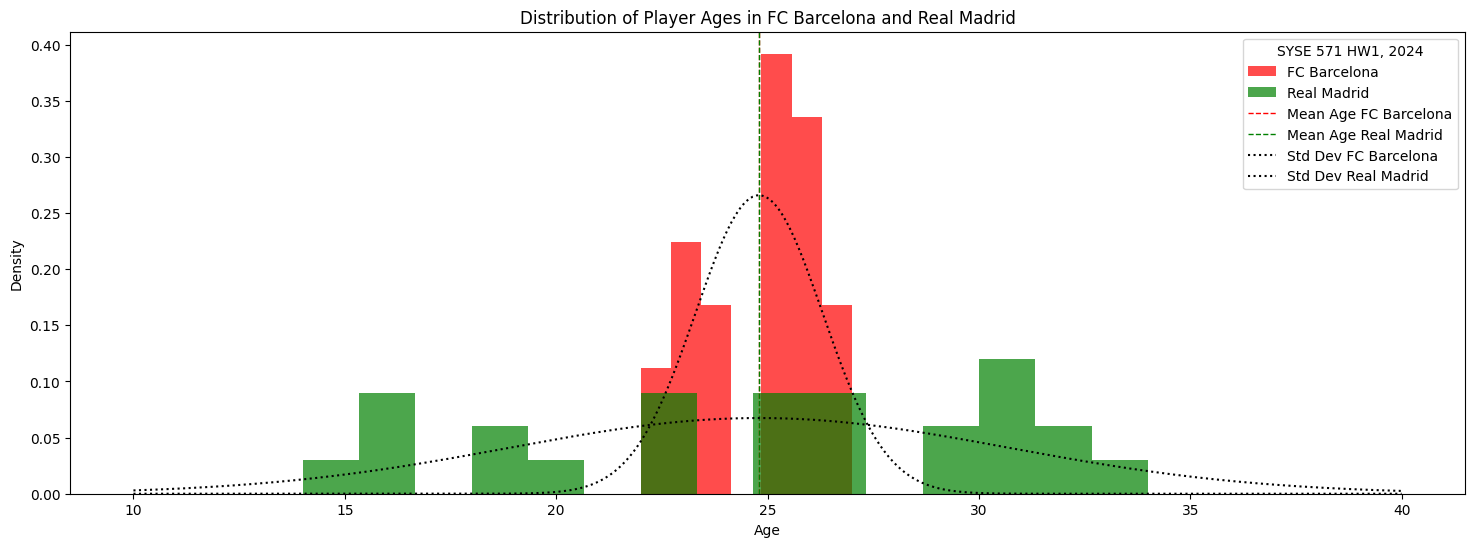

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

barcelona_ages = [27, 27, 25, 25, 24, 27, 25, 26, 26, 24, 22, 23, 24, 26, 23, 23, 25, 25, 26, 25, 26, 23, 22, 25, 26]
real_madrid_ages = [18, 16, 27, 29, 16, 25, 14, 31, 25, 34, 20, 30, 27, 32, 23, 30, 29, 22, 32, 16, 27, 25, 31, 19, 22]

# mean and variance (ddof is considered as 1 here)
mean_barcelona = np.mean(barcelona_ages)
variance_barcelona = np.var(barcelona_ages, ddof=1)
mean_real_madrid = np.mean(real_madrid_ages)
variance_real_madrid = np.var(real_madrid_ages, ddof=1)


df_summary = pd.DataFrame({
    'Team': ['FC Barcelona', 'Real Madrid'],
    'Mean Age': [mean_barcelona, mean_real_madrid],
    'Variance': [variance_barcelona, variance_real_madrid]})
print("\nSummary of Means and Variances:")
print(df_summary)

# Density plot
plt.figure(figsize=(18, 6))
plt.hist(barcelona_ages, bins=7, alpha=0.7, label='FC Barcelona', color='red', density=True)
plt.hist(real_madrid_ages, bins=15, alpha=0.7, label='Real Madrid ', color='green', density=True)

# Plotting mean lines
plt.axvline(mean_barcelona, color='red', linestyle='dashed', linewidth=1, label='Mean Age FC Barcelona')
plt.axvline(mean_real_madrid, color='green', linestyle='dashed', linewidth=1, label='Mean Age Real Madrid')

# SD curves
x_values = np.linspace(10, 40, 300)
plt.plot(x_values, (1 / (np.sqrt(2 * np.pi * variance_barcelona))) * np.exp(-(x_values - mean_barcelona) ** 2 / (2 * variance_barcelona)),
         color='black', linestyle='dotted', linewidth=1.5, label='Std Dev FC Barcelona')
plt.plot(x_values, (1 / (np.sqrt(2 * np.pi * variance_real_madrid))) * np.exp(-(x_values - mean_real_madrid) ** 2 / (2 * variance_real_madrid)),
         color='black', linestyle='dotted', linewidth=1.5, label='Std Dev Real Madrid')

plt.title('Distribution of Player Ages in FC Barcelona and Real Madrid')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title="SYSE 571 HW1, 2024")
plt.show()


In Problem 3, we analyzed and visualized the age distributions of players from two soccer teams, FC Barcelona and Real Madrid. The analysis involved calculating the mean and variance of player ages for both teams and visualizing these distributions using density plots. The results showed that FC Barcelona's players tend to be younger, with a more concentrated age distribution around the mean, while Real Madrid's player ages are more spread out, indicating a greater variance. The visualization, which included both the mean lines and standard deviation curves, highlighted these differences clearly. This analysis suggests that the two teams have different age structures, potentially reflecting different strategies in player recruitment and development.

**ZIRADDINGULUMJANLI2024**